<a href="https://colab.research.google.com/github/ducpb/dog-cat-kaggle/blob/master/test_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
batch_size = 20
height, width = (150,150)

train_generator = train_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/train',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_directory(
        './drive/My Drive/Colab Notebooks/data/validation',
        target_size=(height, width),
        batch_size=batch_size,
        class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
in_put = layers.Input(shape=(150,150,3))
x = layers.Conv2D(24, 3, activation='relu')(in_put)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(48, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(96, 3, activation='relu')(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.4)(x)
out_put = layers.Dense(2, activation='softmax')(x)

model = Model(in_put, out_put)
model.summary();

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 148, 148, 24)      672       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 48)        10416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 96)        41568     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 96)        0     

In [0]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0001), metrics=['acc'])

In [0]:
H =model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 - 630s - loss: 0.6912 - acc: 0.5275 - val_loss: 0.6925 - val_acc: 0.5000
Epoch 2/20
100/100 - 11s - loss: 0.6560 - acc: 0.6255 - val_loss: 0.6302 - val_acc: 0.6580
Epoch 3/20
100/100 - 11s - loss: 0.6030 - acc: 0.6720 - val_loss: 0.5855 - val_acc: 0.6920
Epoch 4/20
100/100 - 11s - loss: 0.5443 - acc: 0.7320 - val_loss: 0.5931 - val_acc: 0.6820
Epoch 5/20
100/100 - 11s - loss: 0.4860 - acc: 0.7690 - val_loss: 0.5428 - val_acc: 0.7240
Epoch 6/20
100/100 - 11s - loss: 0.4499 - acc: 0.7890 - val_loss: 0.5496 - val_acc: 0.7150
Epoch 7/20
100/100 - 11s - loss: 0.4023 - acc: 0.8210 - val_loss: 0.5495 - val_acc: 0.7260
Epoch 8/20
100/100 - 11s - loss: 0.3592 - acc: 0.8455 - val_loss: 0.5579 - val_acc: 0.7270
Epoch 9/20
100/100 - 11s - loss: 0.3291 - acc: 0.8615 - val_loss: 0.5295 - val_acc: 0.7300
Epoch 10/20
100/100 - 11s - loss: 0.2997 - acc: 0.8830 - val_loss: 0.5629 - val_acc: 0.7300
Epoch 11/20


Text(0.5, 1.0, 'Training and validation loss')

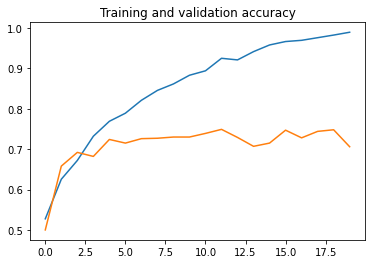

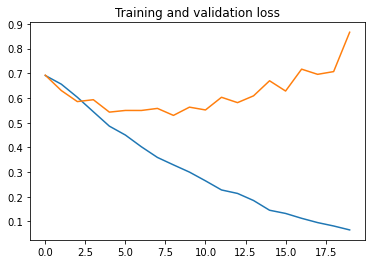

In [0]:
acc = H.history['acc']
val_acc = H.history['val_acc']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')